# IMPORTING NECESSAY LIBRARIES 
    In this part of code, we will importing Libraries so we can do our work properly.
    There are Pandas, Numpy, Plotting Library(Matplotlib, Seaborn) by which we can perform our work more fluently.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DATA LOADING
    In this part of code, we will load the data. Here we have 2 dataset, 
    One is Training Dataset, 
    Second is Testing Dataset.

In [2]:
Rest_train=pd.read_excel('Data_Train.xlsx')
Rest_test=pd.read_excel('Data_Test.xlsx')

In [3]:
display('Restaurant Training -->',Rest_train.head(10))
print('\n')
display('Restaurant Testing -->',Rest_test.head(10))

'Restaurant Training -->'

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


'Restaurant Testing -->'

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4,703 votes
8,NaN,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6 votes


In [4]:
Rest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
Rest_train.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

<Axes: >

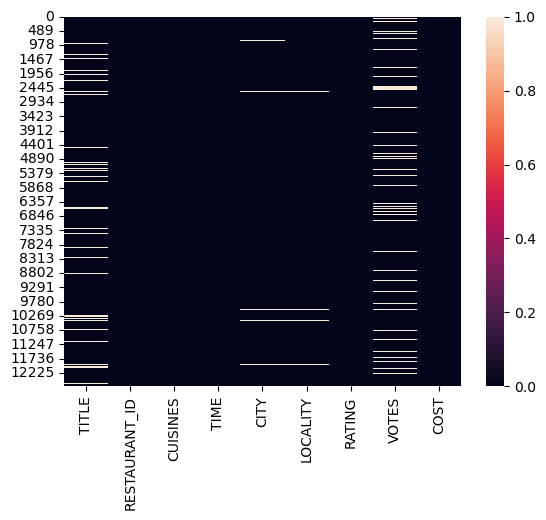

In [6]:
sns.heatmap(Rest_train.isnull())

In [7]:
# Lets Fill the Null Value

In [8]:
#Lets fill the Null Values in each columns by Mode method

for col in Rest_train.columns:
    Rest_train[col].fillna(Rest_train[col].mode()[0], inplace=True)

Rest_train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [9]:
Rest_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

<Axes: >

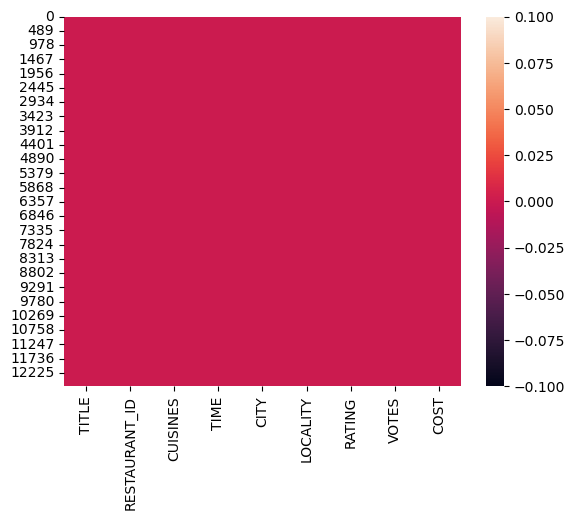

In [10]:
sns.heatmap(Rest_train.isnull())

In [11]:
Rest_train.nunique()

TITLE              112
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

In [12]:
Rest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [13]:
# We need to Change Categorical Column into Numerical 

In [14]:
categorical_columns=['TITLE','CUISINES','TIME','CITY','LOCALITY']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
Label_encoder=LabelEncoder()

In [17]:
for column in categorical_columns:
    Rest_train[column]=Label_encoder.fit_transform(Rest_train[column])

In [18]:
Rest_train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,3.6,49 votes,1200
1,33,13198,289,1885,67,1046,4.2,30 votes,1500
2,31,10915,2976,661,67,1101,3.8,221 votes,800
3,94,6346,4130,275,222,136,4.1,24 votes,800
4,50,15387,1766,615,222,620,3.8,165 votes,300
5,31,5618,3113,1137,222,1360,4.0,550 votes,800
6,22,4383,792,1073,37,575,4.1,509 votes,600
7,82,1249,416,1528,119,1153,4.3,1612 votes,1600
8,94,7062,3924,2020,37,142,3.9,101 votes,300
9,94,10109,2850,627,131,282,3.3,219 votes,200


In [19]:
def remove_alpha(s):
    return ''.join(filter(lambda x: not x.isalpha(), s))

# Apply the function to each element in the column
Rest_train['VOTES'] = Rest_train['VOTES'].apply(remove_alpha)

Rest_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,3.6,49,1200
1,33,13198,289,1885,67,1046,4.2,30,1500
2,31,10915,2976,661,67,1101,3.8,221,800
3,94,6346,4130,275,222,136,4.1,24,800
4,50,15387,1766,615,222,620,3.8,165,300


In [20]:
Rest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  int32 
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  int32 
 3   TIME           12690 non-null  int32 
 4   CITY           12690 non-null  int32 
 5   LOCALITY       12690 non-null  int32 
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int32(5), int64(2), object(2)
memory usage: 644.5+ KB


In [21]:
x=Rest_train.iloc[:,0:-1]

In [22]:
x.drop(columns=['RESTAURANT_ID'], inplace=True)

In [23]:
x.drop(columns=['RATING'],inplace=True)
x.drop(columns=['VOTES'],inplace=True)

In [24]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY
0,31,2627,739,320,285
1,33,289,1885,67,1046
2,31,2976,661,67,1101
3,94,4130,275,222,136
4,50,1766,615,222,620
...,...,...,...,...,...
12685,94,2934,1144,131,342
12686,33,2143,1177,222,133
12687,71,2088,1137,239,1342
12688,31,3506,1837,67,631


In [25]:
y=Rest_train['COST']

In [26]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
# Fit and Transform the Feature using the Scaler
x_scaled=scaler.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.2,random_state=42)

In [31]:
display("X_Train_shape -->",x_train.shape)
display("X_Test_shape -->",x_test.shape)
display("Y_Train_Shape -->",y_train.shape)
display("Y_Test_shape -->",y_test.shape)

'X_Train_shape -->'

(10152, 5)

'X_Test_shape -->'

(2538, 5)

'Y_Train_Shape -->'

(10152,)

'Y_Test_shape -->'

(2538,)

In [32]:
feature=['TITLE','CUISINES','TIME','CITY','LOCALITY']

In [33]:
x_train_df=pd.DataFrame(x_train,columns=feature)
x_test_df=pd.DataFrame(x_test,columns=feature)

In [34]:
display("X_Train_DF -->",x_train_df.head(10))
print('\n')
display("X_Test_DF -->",x_test_df.head(10))

'X_Train_DF -->'

,TITLE,CUISINES,TIME,CITY,LOCALITY
0,1.043834,0.260627,0.046281,0.366054,-0.835357
1,1.043834,0.037213,0.503580,-0.337012,1.304454
2,-0.293665,-0.383037,-1.521790,-0.134433,-1.261315
3,1.043834,-0.921224,-0.828551,-0.897082,-0.752671
4,1.043834,1.410917,1.183563,-0.897082,1.552512
5,1.043834,1.410917,-1.504558,-0.134433,-0.216466
6,1.043834,-1.563227,-0.457410,-1.254573,-0.429444
7,-0.293665,-0.363935,0.002540,-1.254573,-0.519647
8,-0.628039,-0.640503,0.503580,-1.254573,0.552764
9,-0.810425,-0.337358,0.645409,0.949957,-1.015763


'X_Test_DF -->'

,TITLE,CUISINES,TIME,CITY,LOCALITY
0,1.043834,0.962428,-0.904105,1.867518,1.650231
1,1.043834,1.253115,-0.196286,-0.897082,-1.399125
2,-1.114402,-1.131349,1.493731,-0.134433,-0.216466
3,-0.871221,0.475735,-0.828551,2.022431,-0.892987
4,1.043834,1.300456,0.808446,-1.254573,0.011547
5,-0.871221,0.209134,0.876047,0.366054,-0.835357
6,-0.871221,-0.909596,-0.448132,0.949957,0.066671
7,-0.871221,0.456633,-1.207645,1.152535,0.540236
8,-1.813549,-1.559904,-0.550195,-0.134433,-0.467029
9,1.043834,0.590349,-0.617796,0.580549,-0.524659


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [36]:
# List of Classifier to Evaluate
classifier={
    "Random_Forest":RandomForestClassifier(random_state=42),
    "SCV":SVC(),
    "LogisticRegression":LogisticRegression(random_state=42),
    "DecisionTree":DecisionTreeClassifier(random_state=42)
}

result={}         # Store the Cross_Validation Result

for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)

    accuracy=accuracy_score(y_test,y_pred)
    

    result[name]={
        "Accuracy":accuracy
    }

In [37]:
# Print Result
for name,metrics in result.items():
    print(f"classifier:{name}")
    print(f"Accuracy:{metrics['Accuracy']:.2f}")
    print('\n')

classifier:Random_Forest
Accuracy:0.16


classifier:SCV
Accuracy:0.15


classifier:LogisticRegression
Accuracy:0.14


classifier:DecisionTree
Accuracy:0.14


